In [59]:
import pandas as pd
import numpy as np
from numpy import linalg
import statsmodels as sm
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
import math
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import StandardScaler

In [60]:
df=pd.read_csv("c://j-works22/works/data/macro_month.csv")
y=df['y']
x1=df['x1']
x2=df['x2']
x3=df['x3']
x4=df['x4']
x5=df['x5']
z=pd.concat([x1,x2,x3,x4,x5],axis=1)
n=len(y)
# np.shape(z)
# x=StandardScaler(with_mean=True, with_std=True).fit_transform(x)

In [97]:
w=np.matmul(z.T, z)   
evals, evecs = np.linalg.eig(w)
# np.shape(evecs)

# Eigenvalues and eigenvectors as descending order
sort=np.argsort(-1*evals)
vals=evals[sort]
vecs=evecs[:, sort]

# the largest eigenvalue and eigenvector
vals0=vals[0]
vals1=vals[1]
vecs0=vecs[:,0]
vecs1=vecs[:,1]

# f0 is the the largest factor
g0=np.sqrt(n)*vecs0
g1=np.sqrt(n)*vecs1
g=np.vstack((g0,g1))
g=g.T

f=np.matmul(z, g)/n

# np.shape(f)
# rescaled factor
# factor0=np.array(f0)
#f0=f0.reshape(-1,1)
#f0=StandardScaler(with_mean=True, with_std=True).fit_transform(f0)


C:\Users\ewha\AppData\Local\Temp/ipykernel_72320/2347120081.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  w=np.matmul(z.T, z)


(258, 2)

In [114]:
f=np.array(f)
f0=f[:, 0]
f1=f[:,1]

Text(0.5, 1.0, 'The two largest Factor')

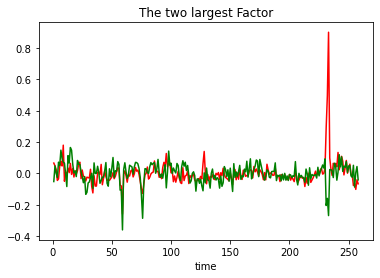

In [117]:
# Plot of the largest factor

kk=len(f0)
seqa=[ i for i in range(1, kk+1)]
plt.plot(seqa, f0, color='r')
plt.plot(seqa, f1, color='g')
plt.xlabel('time')
# plt.ylabel('the two largest factor')
plt.title('The two largest Factor')

In [118]:
# VAR estimation 
w=np.column_stack((f, y))
result=VAR(w).fit(maxlags=10, ic='bic')
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 09, Nov, 2022
Time:                     14:42:58
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -14.9099
Nobs:                     256.000    HQIC:                  -15.0838
Log likelihood:           876.952    FPE:                2.50273e-07
AIC:                     -15.2008    Det(Omega_mle):     2.30816e-07
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.000362         0.004352           -0.083           0.934
L1.y1         0.526158         0.063423            8.296           0.000
L1.y2        -0.038154         0.072276           -0.528           0.598
L1.y3         0.008873